
##  Weather forecasting with time-series data

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary


**Problem Definition:**
The project involves analyzing a time-series dataset containing daily weather measurements in Delhi from 2013 to 2017. The primary goal is to explore and visualize the dataset's characteristics, prepare the data for multivariate time series analysis, and develop a deep learning model to forecast the mean daily temperature ("meantemp") two weeks into the future.

The objective is to provide accurate temperature forecasts for better planning and decision-making.

**Proposed approaches:**
- To address the business problem, a recurrent neural network (RNN) technique was employed. Specifically, Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) models were explored.

- Several experiments were conducted to identify the best-performing model configuration. These experiments involved different combinations of LSTM and GRU architectures with varying numbers of layers (units) and sequence lengths (n_steps). The goal was to find the model that yielded the lowest Mean Absolute Error (MAE) across different forecasting horizons.

**Major Findings and Recommendations:**

Model architecture of LSTM, units = 150 layers, n-steps = 30 and mode architecture of GRU, units = 150 layers, n-steps = 30 achieved the lowest average MAE across forecasting horizons, both at 3.16. These models tied for the best performance in terms of accuracy.

Recommendations to Improve Model Performance:

1. More Data: Acquire additional historical data to increase the model's training dataset. Deep learning models often benefit from larger datasets, and having more historical weather data can help capture complex patterns.

2. Cross-Validation: Implement cross-validation techniques to obtain better estimates of mean temperature predictions and ensure the model generalizes well to unseen data. This approach can provide more robust results compared to a simple holdout method.

3. Feature Selection: Evaluate the importance of different input features and consider removing less relevant ones to simplify the model and reduce the risk of overfitting. Additionally, consider incorporating other relevant meteorological variables, such as cloudiness and precipitation, to enhance the model's inputs and potentially improve forecasting accuracy.

4. Regularization: Apply regularization techniques to prevent overfitting, particularly if the model performs well on the training data but poorly on validation or test data. Regularization can help maintain model generalization.

5. Hyperparameter Tuning: Continue experimenting with different hyperparameters for the chosen architecture. Explore various combinations of units, layers, and sequence lengths (n_steps) to identify configurations that further improve forecasting accuracy.

In conclusion, achieving accurate temperature forecasts in a multivariate time series analysis is a complex task that can benefit from both data-related and model-related enhancements. By incorporating these recommendations and refining the deep learning model, it is possible to enhance the accuracy and reliability of temperature predictions, which can have valuable applications in weather forecasting and planning.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

The analysis requires `Pandas` and `Numpy` for data manipulation, `Matplotlib.pyplot` for data visualization, `scikit-learn` for scaling and evaluation, and `TensorFlow` for modeling.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)

Upload the given dataset

In [2]:
dataset = pd.read_csv(
    'Part3_Weather.csv', index_col='Date', parse_dates=["Date"], dayfirst= True)
print(dataset.head())

             meantemp   humidity  wind_speed  meanpressure
Date                                                      
2013-01-01  10.000000  84.500000    0.000000     10.156667
2013-01-02   7.400000  92.000000    2.980000     10.178000
2013-01-03   7.166667  87.000000    4.633333     10.186667
2013-01-04   8.666667  71.333333    1.233333     10.171667
2013-01-05   6.000000  86.833333    3.700000     10.165000


The `.describe()` function helps us analyze the data in depth

In [3]:
print(dataset.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1575.000000  1575.000000  1575.000000   1575.000000
mean     25.231582    60.420115     6.903642     10.105897
std       7.337316    16.956083     4.508803      1.752983
min       6.000000    13.428571     0.000000     -0.030417
25%      18.516667    49.750000     3.700000     10.018750
50%      27.166667    62.380952     6.370000     10.090000
75%      31.142857    72.125000     9.262500     10.151833
max      38.714286    98.000000    42.220000     76.793333


The results you provided seem to be summary statistics for four different weather-related variables: meantemp, humidity, wind_speed, and meanpressure. Let's break down the information:

**Temperature (meantemp):**
- Temperature has an average (mean) of approximately 25.23 degrees.
It exhibits moderate variability with a standard deviation of about 7.34 degrees.
- The temperature range spans from a minimum of 6.00 degrees to a maximum of 38.71 degrees.
- The median temperature (27.17 degrees) is close to the mean, suggesting a relatively symmetric distribution.

**Humidity:**
- Humidity has an average of approximately 60.42%.
It shows moderate variability with a standard deviation of about 16.96%.
- The humidity range is quite wide, from a minimum of approximately 13.43% to a maximum of 98.00%.
- The median humidity (62.38%) is similar to the mean, indicating a relatively symmetric distribution.

**Wind Speed (wind_speed):**
- Wind speed has an average of approximately 6.90 units (possibly in meters per second or another appropriate unit).
It exhibits moderate variability with a standard deviation of about 4.51 units.
- Wind speed varies from a minimum of 0.00 units (possibly indicating calm conditions) to a maximum of 42.22 units, suggesting the presence of outliers.
- The median wind speed (6.37 units) is similar to the mean, but the distribution may be right-skewed due to the presence of high outliers.

**Mean Pressure (meanpressure):**
- Mean pressure has an average of approximately 10.11 units (possibly in millibars or another appropriate unit). It shows moderate variability with a standard deviation of about 1.75 units.
- An unusual observation is a minimum mean pressure of approximately -0.03 units, which is unexpected as pressure should typically be positive.
- At the same time, the max value of mean pressure is nearly 77 units, which is considered as an outlier due to the big gap from mostly distributed values.
- The median mean pressure (10.09 units) is close to the mean, suggesting a relatively symmetric distribution, but the presence of the negative minimum requires further investigation.

In summary, temperature and humidity exhibit relatively symmetric distributions with moderate variability. Wind speed has a wider range and may have a right-skewed distribution due to high wind speed outliers. Mean pressure shows variability but also contains an unusual negative minimum value that needs attention to ensure data quality.

The `.isna()` function helps to determine if there are missing values in the dataset. As the results, there is no missing value in any variable of the dataset.

In [4]:
dataset.isna().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Plots a simple line graph for multiple time series to analyze the trend of each variable

Text(0.5, 1.0, 'meanpressure')

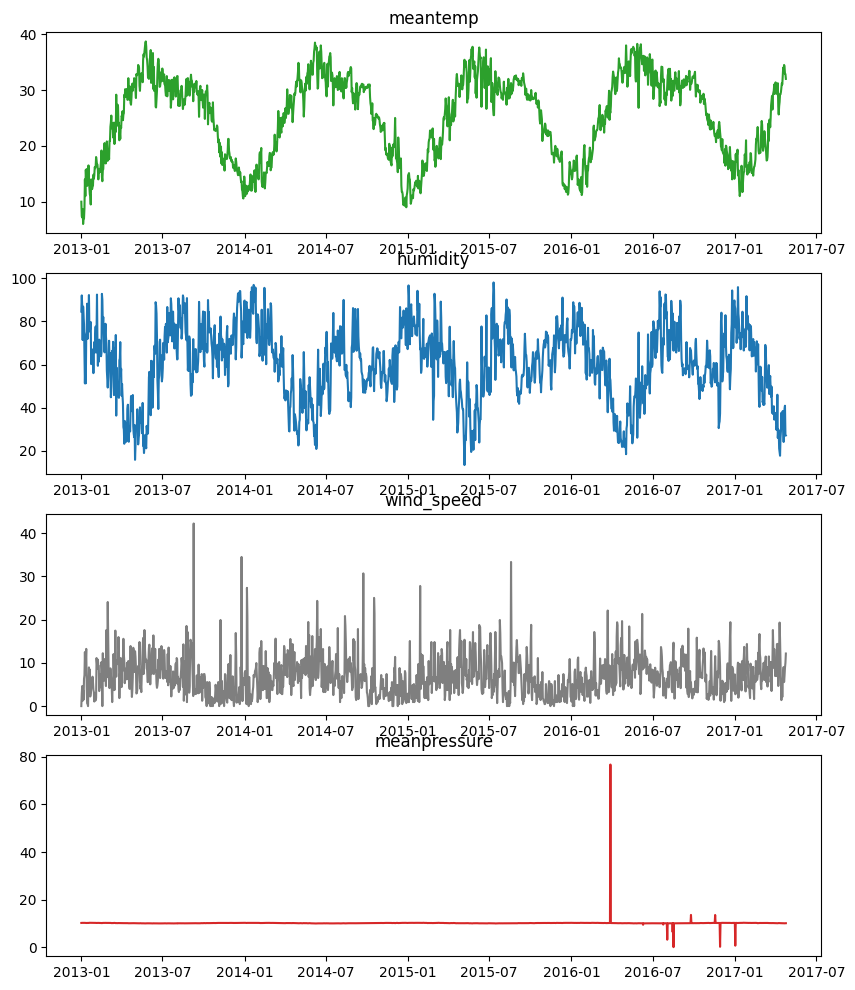

In [5]:
fig, axs = plt.subplots(4, 1,figsize=(10, 12))
axs[0].plot(dataset['meantemp'],'tab:green')
axs[0].set_title('meantemp')
axs[1].plot(dataset['humidity'],'tab:blue')
axs[1].set_title('humidity')
axs[2].plot(dataset['wind_speed'],'tab:grey')
axs[2].set_title('wind_speed')
axs[3].plot(dataset['meanpressure'],'tab:red')
axs[3].set_title('meanpressure')

As it can be spotted out from the graphs, unlike meantemp. humidity, wind_speed, meanpressure variable didnot show any significant pattern of trend across the timeline together with many unusual outliers detected, inline with the above summary statistics.


Since the model is to predict 'meantemp', let's explore the correlation between other features and meantemp to identify the potential predictors.

Correlation between Humidity and Meantemp: -0.57
Correlation between Wind Speed and Meantemp: 0.29
Correlation between Mean Pressure and Meantemp: -0.03


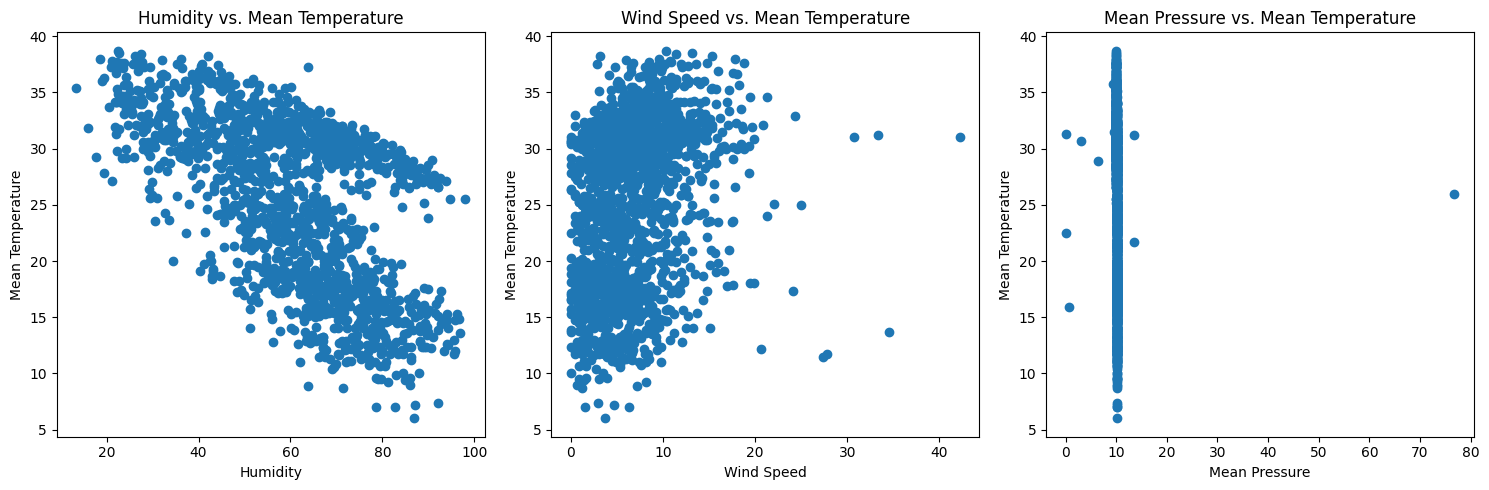

In [6]:
# Generate scatter plots for the correlation analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for humidity vs. meantemp
axes[0].scatter(dataset['humidity'], dataset['meantemp'])
axes[0].set_xlabel('Humidity')
axes[0].set_ylabel('Mean Temperature')
axes[0].set_title('Humidity vs. Mean Temperature')

# Scatter plot for wind_speed vs. meantemp
axes[1].scatter(dataset['wind_speed'], dataset['meantemp'])
axes[1].set_xlabel('Wind Speed')
axes[1].set_ylabel('Mean Temperature')
axes[1].set_title('Wind Speed vs. Mean Temperature')

# Scatter plot for meanpressure vs. meantemp
axes[2].scatter(dataset['meanpressure'], dataset['meantemp'])
axes[2].set_xlabel('Mean Pressure')
axes[2].set_ylabel('Mean Temperature')
axes[2].set_title('Mean Pressure vs. Mean Temperature')

# Calculate and print the correlation coefficients
correlation_humidity = dataset['humidity'].corr(dataset['meantemp'])
correlation_wind_speed = dataset['wind_speed'].corr(dataset['meantemp'])
correlation_meanpressure = dataset['meanpressure'].corr(dataset['meantemp'])

print(f"Correlation between Humidity and Meantemp: {correlation_humidity:.2f}")
print(f"Correlation between Wind Speed and Meantemp: {correlation_wind_speed:.2f}")
print(f"Correlation between Mean Pressure and Meantemp: {correlation_meanpressure:.2f}")

plt.tight_layout()
plt.show()

The correlation coefficients obtained between humidity, wind speed, mean pressure, and meantemp (mean temperature) provide insights into the relationships between these variables:

**Correlation between Humidity and Meantemp (-0.57)**:

The correlation coefficient of -0.57 indicates a moderate negative correlation between humidity and mean temperature.

=> When humidity increases, there is a tendency for the mean temperature to decrease, and vice versa. In other words, higher humidity levels are associated with lower mean temperatures. This is a typical pattern, as higher humidity often leads to cooler and more comfortable conditions.

**Correlation between Wind Speed and Meantemp (0.29)**:

The correlation coefficient of 0.29 indicates a weak positive correlation between wind speed and mean temperature.

=> There is a slight tendency for mean temperature to increase as wind speed increases, although the correlation is not very strong. This suggests that windy conditions may have a mild warming effect on the mean temperature, but other factors likely play a more significant role in temperature variation.

**Correlation between Mean Pressure and Meantemp (-0.03):**

The correlation coefficient of -0.03 indicates a very weak negative correlation between mean pressure and mean temperature.

=> There is almost no meaningful relationship between mean pressure and mean temperature based on this correlation coefficient. Any observed correlation is very close to zero, suggesting that changes in mean pressure do not have a significant impact on mean temperature in this dataset.

Overall, these correlation results suggest that humidity has the most noticeable influence on mean temperature, with higher humidity being associated with lower temperatures. Wind speed has a much weaker influence, causing a slight increase in temperature with higher wind speeds. Mean pressure, in this dataset, appears to have almost no impact on mean temperature.

Combining all the exploration steps above, 'meanpressure' should be removed within the dataset for a further multivariate analysis for a better prediction of 'meantemp'.

In [7]:
#Remove 'meanpressure' from the dataset
dataset = dataset.drop(["meanpressure"], axis=1)
print(dataset.head())

             meantemp   humidity  wind_speed
Date                                        
2013-01-01  10.000000  84.500000    0.000000
2013-01-02   7.400000  92.000000    2.980000
2013-01-03   7.166667  87.000000    4.633333
2013-01-04   8.666667  71.333333    1.233333
2013-01-05   6.000000  86.833333    3.700000


Next, we apply the `MinMaxScaler` function to standardize our training set, which will help us avoid the outliers or anomalies.

Instead of applying `MinMaxScaler` for all the dataset, it is better to apply for each column since each feature presenting different unique characteristics with different units. With this approach, we shall capture the fluctuation of the pattern of each variable.

In [8]:
# Apply MinMaxScaler to each column of the dataset since the unit of each variable are different
for column in dataset.columns:
    sc = MinMaxScaler(feature_range=(0, 1))
    column_data = dataset[column].values.reshape(-1, 1)
    column_scaled = sc.fit_transform(column_data)
    dataset[column] = column_scaled

The `train_test_split` function divides the dataset into two subsets: `training_set` and `test_set`. We use data from 2013 to 2016 as training set, 2017 as test set.

In [9]:
#Define start-end time
tstart = 2013
tend = 2016

#Apply train_test_split for training and test subsets
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}"]
    test = dataset.loc[f"{tend+1}":]
    return train, test
training_set, test_set = train_test_split(dataset, tstart, tend)

#Transform training set back to table format with 4 features
training_set_shape = training_set.shape
test_set_shape = test_set.shape
training_set = training_set.values.reshape(training_set_shape[0], training_set_shape[1])

#Print out to check training_set
print('training_set shape:', training_set.shape)
training_set

training_set shape: (1461, 3)


array([[0.12227074, 0.84037162, 0.        ],
       [0.04279476, 0.92905405, 0.07058266],
       [0.0356623 , 0.86993243, 0.10974262],
       ...,
       [0.28238719, 0.88006757, 0.14211274],
       [0.24745269, 0.90146396, 0.14842886],
       [0.276718  , 0.86993243, 0.17349597]])

Moving on, The `split_sequence` function uses a training dataset with a desired n_steps, forcasting horizon and the label, and thus converts it into inputs (X_train) and outputs (y_train).

In [10]:
#For this analysis, we define split_sequence that takes 4 arguments: sequence, n_steps, forcasting horizon, and y_index as the label column
#split  a time series sequence into input-output pairs for training a sequence prediction model
def split_sequence(sequence, n_steps,forecasting_horizon, y_index):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - forecasting_horizon:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:end_ix+forecasting_horizon,y_index]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

Since we are working with multivariate series, so the number of features is three. The number of output is one for Mean Temperature. We need to ensure that the shape of X_train and y_train are compartible with the RNN model.

We aim to build a forecasting model capable of predicting `meantemp` Mean Temperature 14 days ahead based on 3 features `meantemp`, `humidity`, and `wind_speed`.

In [11]:
n_steps = 30 #using 40 days as past data to predict the future
forecasting_horizon = 14 #predict the meantemp in the next 2 weeks (14 days)
features = 3 #Since we only choose 3 significant variables
y_index = 0 #the index of 'meantemp' column
# split into samples
X_train, y_train = split_sequence(training_set, n_steps,forecasting_horizon,y_index)
# Reshaping Y_train for model
y_train  = y_train.reshape(y_train .shape[0],y_train.shape[1],1)

Visualize one training sample.

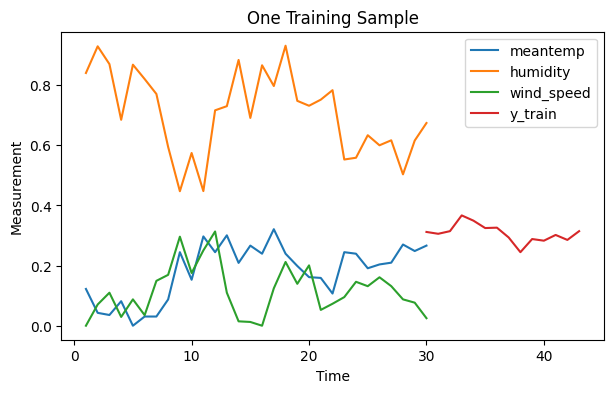

In [12]:
plt.figure(figsize=(7, 4))
plt.plot(np.arange(1, n_steps+1, 1),X_train[0,:,0])
plt.plot(np.arange(1, n_steps+1, 1),X_train[0,:,1])
plt.plot(np.arange(1, n_steps+1, 1),X_train[0,:,2])
plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1),y_train[0])
plt.title('One Training Sample')
plt.ylabel('Measurement')
plt.xlabel('Time')
plt.legend(['meantemp','humidity','wind_speed', 'y_train'], loc='best',bbox_to_anchor=(1, 1))

<a id = "cell_model"></a>
## 3. Predictive Modeling

The model consists of a single hidden layer of LSTM and an output layer. For this experiment, we will set LSTM units to 150, tanh as activation, and set input size.

Finally, we will compile the model with an RMSprop optimizer and mean square error as a loss function.

In [13]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=150, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=14))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               92400     
                                                                 
 dense (Dense)               (None, 14)                2114      
                                                                 
Total params: 94,514
Trainable params: 94,514
Non-trainable params: 0
_________________________________________________________________


The model will train on 100 epochs with 32 batch sizes. The epochs parameter specifies the number of times the model will iterate over the entire training dataset, and the batch_size parameter specifies the number of samples that will be used in each iteration.

In [14]:
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
45/45 [==============================] - 9s 100ms/step - loss: 0.0445
Epoch 2/100
45/45 [==============================] - 5s 122ms/step - loss: 0.0173
Epoch 3/100
45/45 [==============================] - 4s 82ms/step - loss: 0.0143
Epoch 4/100
45/45 [==============================] - 2s 46ms/step - loss: 0.0121
Epoch 5/100
45/45 [==============================] - 2s 47ms/step - loss: 0.0108
Epoch 6/100
45/45 [==============================] - 3s 78ms/step - loss: 0.0102
Epoch 7/100
45/45 [==============================] - 2s 45ms/step - loss: 0.0092
Epoch 8/100
45/45 [==============================] - 2s 45ms/step - loss: 0.0091
Epoch 9/100
45/45 [==============================] - 2s 46ms/step - loss: 0.0087
Epoch 10/100
45/45 [==============================] - 2s 46ms/step - loss: 0.0078
Epoch 11/100
45/45 [==============================] - 2s 49ms/step - loss: 0.0081
Epoch 12/100
45/45 [==============================] - 3s 75ms/step - loss: 0.0079
Epoch 13/100
45/45 [===

Next, we are going to repeat preprocessing and normalize the test set. First of all we will transform then split the dataset into samples, reshape it, predict, and inverse transform the predictions into standard form.

In [35]:
#scaling
inputs = test_set.values.reshape(-1,1)

#Reshape back to orignal format after rescaling
inputs = inputs.reshape(test_set_shape[0], test_set_shape[1])

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps,forecasting_horizon,y_index)
number_test_samples = X_test.shape[0]
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (71, 30, 3)
y_test shape: (71, 14)


Now we predict the Mean Temperature based on the test subset.

In [36]:
#prediction
predicted_meantemp = model_lstm.predict(X_test)

#inverse transform the predicted values
predicted_meantemp = sc.inverse_transform(predicted_meantemp)
print('predicted_meantemp shape: ', predicted_meantemp.shape)

#inverse transform the test labels.
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1])
y_test = sc.inverse_transform(y_test)

3/3 [==============================] - 0s 15ms/step
predicted_meantemp shape:  (71, 14)


Next, we evaluate the prediction performance between the true and predicted values. Note, the forecasting peformance tend to decrease when predicting far away forecasting horizons.

In [37]:
def return_mae(test, predicted):
    mae = mean_absolute_error(test, predicted)
    print("Mean Absolute Error {:.2f}.".format(mae))

for i in range(forecasting_horizon):
  print("Forecasting Horizon: {} ".format(i))
  return_mae(y_test[:,i],predicted_meantemp[:,i])
  print("")

Forecasting Horizon: 0 
Mean Absolute Error 2.06.

Forecasting Horizon: 1 
Mean Absolute Error 2.47.

Forecasting Horizon: 2 
Mean Absolute Error 2.67.

Forecasting Horizon: 3 
Mean Absolute Error 2.77.

Forecasting Horizon: 4 
Mean Absolute Error 3.06.

Forecasting Horizon: 5 
Mean Absolute Error 3.23.

Forecasting Horizon: 6 
Mean Absolute Error 3.22.

Forecasting Horizon: 7 
Mean Absolute Error 3.31.

Forecasting Horizon: 8 
Mean Absolute Error 3.39.

Forecasting Horizon: 9 
Mean Absolute Error 3.53.

Forecasting Horizon: 10 
Mean Absolute Error 3.79.

Forecasting Horizon: 11 
Mean Absolute Error 3.74.

Forecasting Horizon: 12 
Mean Absolute Error 3.61.

Forecasting Horizon: 13 
Mean Absolute Error 3.32.



The MAE values increase as the forecasting horizon (the number of days ahead) increases, which is a common pattern in time series forecasting. Predicting further into the future becomes more challenging.

The model achieves its lowest MAE at a forecasting horizon of 0 (Day 1), with an MAE of 2.06. This indicates good accuracy for short-term predictions.

As the forecasting horizon extends to 1, 2, and 3 days ahead, the MAE gradually increases, suggesting that the model's accuracy decreases as it attempts to forecast further into the future.

Beyond the 3rd forecasting horizon, there is a more noticeable increase in MAE, indicating that the model faces greater difficulties in maintaining accuracy for longer-term predictions.

The highest MAE is observed at the 9th forecasting horizon (10 days ahead), with an MAE of 3.79. This indicates that the model's predictions become less precise as it attempts to capture temperature trends over an extended period.

In summary, these results highlight the inherent challenge of forecasting accuracy for longer-term horizons and the model's ability to provide more accurate predictions for shorter-term intervals.

Visualize the testing and predicted values of each testing time series segment.

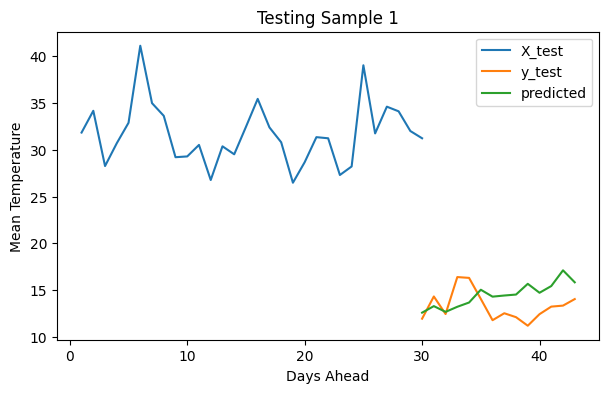

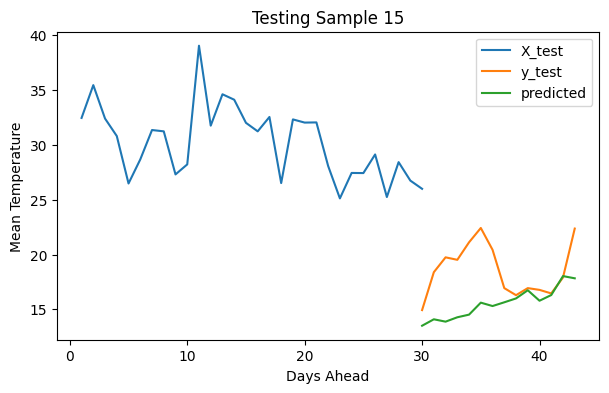

In [38]:
#Inverse transform the test data to orignal unit for visualization
X_test = X_test.reshape(-1, 30)
X_test = sc.inverse_transform(X_test)
X_test = X_test.reshape(number_test_samples, 30, 3)

#we visualize the real vs. predicted values of the last testing segment.
sample_index = 1

plt.figure(figsize=(7, 4))
plt.plot(np.arange(1, n_steps+1, 1),X_test[sample_index,:,1])
plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1),y_test[sample_index,:])
plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1),predicted_meantemp[sample_index,:])
plt.title('Testing Sample ' + str(sample_index))
plt.ylabel('Mean Temperature')
plt.xlabel('Days Ahead')
plt.legend(['X_test', 'y_test', 'predicted'], loc='best')

#we visualize the real vs. predicted values of the last testing segment.
sample_index = 15

plt.figure(figsize=(7, 4))
plt.plot(np.arange(1, n_steps+1, 1),X_test[sample_index,:,1])
plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1),y_test[sample_index,:])
plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1),predicted_meantemp[sample_index,:])
plt.title('Testing Sample ' + str(sample_index))
plt.ylabel('Mean Temperature')
plt.xlabel('Days Ahead')
plt.legend(['X_test', 'y_test', 'predicted'], loc='best')

The two samples can tell the vairation of the true and predicted values of mean temperature:

- In Sample 1, the model predict quite close to the true values at the very first forcasting horizon (Day 31 -32), since the 2 lines are close to each other.

- On the other hand, Sample 5 testing shows that the model can predict more accurate on the far future of the forcasting horizon (Day 38-43).



Visualize all the real testing values versus the all predicted values based on each forecasting horizon.

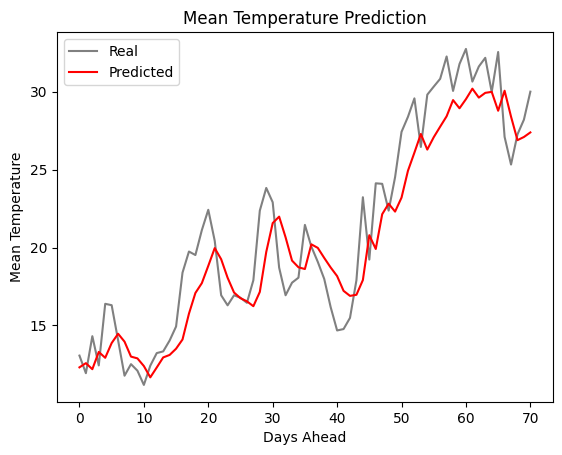

In [19]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("Mean Temperature Prediction")
    plt.xlabel("Days Ahead")
    plt.ylabel("Mean Temperature")
    plt.legend()
    plt.show()

#Here we visualize the real vs. predicted values for one day forecasting horizon.
plot_predictions(y_test[:,0],predicted_meantemp[:,0])

As it can be seen from the time series line chart, the predicted (red line) is close to the real values of Mean temperature. The model seems to capture the long-term trend of the real values rather than the short-term trend of the pattern.

We are going to keep everything the same and just replace the LSTM layer with the GRU layer to properly compare the results. The model structure contains a single GRU layer with 125 units and an output layer.

In [20]:
tstart = 2013
tend = 2016

def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}"]
    test = dataset.loc[f"{tend+1}":]
    return train, test
new_training_set, new_test_set = train_test_split(dataset, tstart, tend)

new_training_set_shape = new_training_set.shape
new_test_set_shape = new_test_set.shape
new_training_set = new_training_set.values.reshape(new_training_set_shape[0], new_training_set_shape[1])

n_steps = 30
forecasting_horizon = 14
features = 3
y_index = 0 # the index of 'meantemp'column
# split into samples
new_X_train, new_y_train = split_sequence(new_training_set, n_steps,forecasting_horizon,y_index)

# Reshaping X_train for model
new_y_train  = new_y_train.reshape(new_y_train.shape[0],new_y_train.shape[1],1)

# The GRU architecture
model_gru = Sequential()
model_gru.add(GRU(units=150, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=14))
# Compiling the model
model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.fit(new_X_train, new_y_train, epochs=100, batch_size=32)

Epoch 1/100
45/45 [==============================] - 5s 64ms/step - loss: 0.0515
Epoch 2/100
45/45 [==============================] - 2s 51ms/step - loss: 0.0121
Epoch 3/100
45/45 [==============================] - 2s 42ms/step - loss: 0.0104
Epoch 4/100
45/45 [==============================] - 2s 42ms/step - loss: 0.0098
Epoch 5/100
45/45 [==============================] - 2s 42ms/step - loss: 0.0091
Epoch 6/100
45/45 [==============================] - 2s 43ms/step - loss: 0.0090
Epoch 7/100
45/45 [==============================] - 3s 60ms/step - loss: 0.0083
Epoch 8/100
45/45 [==============================] - 3s 56ms/step - loss: 0.0083
Epoch 9/100
45/45 [==============================] - 2s 42ms/step - loss: 0.0079
Epoch 10/100
45/45 [==============================] - 2s 43ms/step - loss: 0.0076
Epoch 11/100
45/45 [==============================] - 2s 43ms/step - loss: 0.0075
Epoch 12/100
45/45 [==============================] - 2s 43ms/step - loss: 0.0075
Epoch 13/100
45/45 [=====

In [21]:
#scaling
new_inputs = new_test_set.values.reshape(-1,1)

#Reshape back to orignal format after rescaling
new_inputs = new_inputs.reshape(new_test_set_shape[0], new_test_set_shape[1])

# Split into samples
new_X_test, new_y_test = split_sequence(new_inputs, n_steps,forecasting_horizon,y_index)
new_number_test_samples = new_X_test.shape[0]

#prediction
new_predicted_meantemp = model_lstm.predict(new_X_test)

#inverse transform the predicted values
new_predicted_meantemp = sc.inverse_transform(new_predicted_meantemp)

#inverse transform the test labels.
new_y_test = new_y_test.reshape(new_y_test.shape[0], new_y_test.shape[1])
new_y_test = sc.inverse_transform(new_y_test)

#evaluate the prediction performance between the true and predicted values
for i in range(forecasting_horizon):
  print("Forecasting Horizon: {} ".format(i))
  return_mae(new_y_test[:,i],new_predicted_meantemp[:,i])
  print("")

3/3 [==============================] - 0s 15ms/step
Forecasting Horizon: 0 
Mean Absolute Error 2.06.

Forecasting Horizon: 1 
Mean Absolute Error 2.47.

Forecasting Horizon: 2 
Mean Absolute Error 2.67.

Forecasting Horizon: 3 
Mean Absolute Error 2.77.

Forecasting Horizon: 4 
Mean Absolute Error 3.06.

Forecasting Horizon: 5 
Mean Absolute Error 3.23.

Forecasting Horizon: 6 
Mean Absolute Error 3.22.

Forecasting Horizon: 7 
Mean Absolute Error 3.31.

Forecasting Horizon: 8 
Mean Absolute Error 3.39.

Forecasting Horizon: 9 
Mean Absolute Error 3.53.

Forecasting Horizon: 10 
Mean Absolute Error 3.79.

Forecasting Horizon: 11 
Mean Absolute Error 3.74.

Forecasting Horizon: 12 
Mean Absolute Error 3.61.

Forecasting Horizon: 13 
Mean Absolute Error 3.32.



As the forecasting horizon increases (1 to 14 days ahead), the MAE generally increases progressively. This is expected, as forecasting further into the future becomes inherently more challenging due to the accumulation of uncertainty.

Overall, the results demonstrate the increasing difficulty of predicting mean daily temperature accurately as the forecasting horizon extends further into the future. While the model performs well for short-term predictions, it faces challenges in maintaining accuracy for longer-term forecasts, likely due to the inherent variability and uncertainty in weather data.

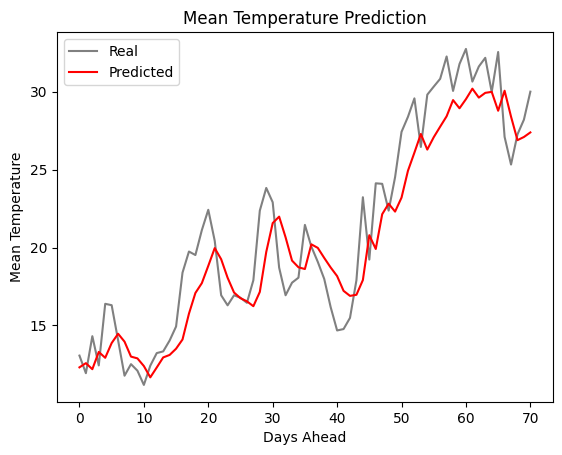

In [22]:
#Here we visualize the real vs. predicted values for one day forecasting horizon.
plot_predictions(new_y_test[:,0],new_predicted_meantemp[:,0])

Similar to LSMT layers approach, the GRU architecture model can also predict closely to the real values of mean temperature. The model again showcases that prediction can be more accurate in capturing the trend in longer term but not the short term periods.

<a id = "cell_report"></a>
## 4. Experiments Report

Different experiments have been conducted with different hyperparameters for the chosen architecture, focused on:
- Number of layers (units)
- Sequence lengths (n_steps)
- Try on different model LSMT/GRU

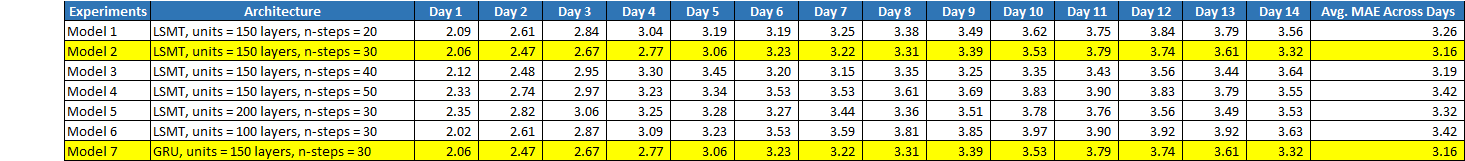

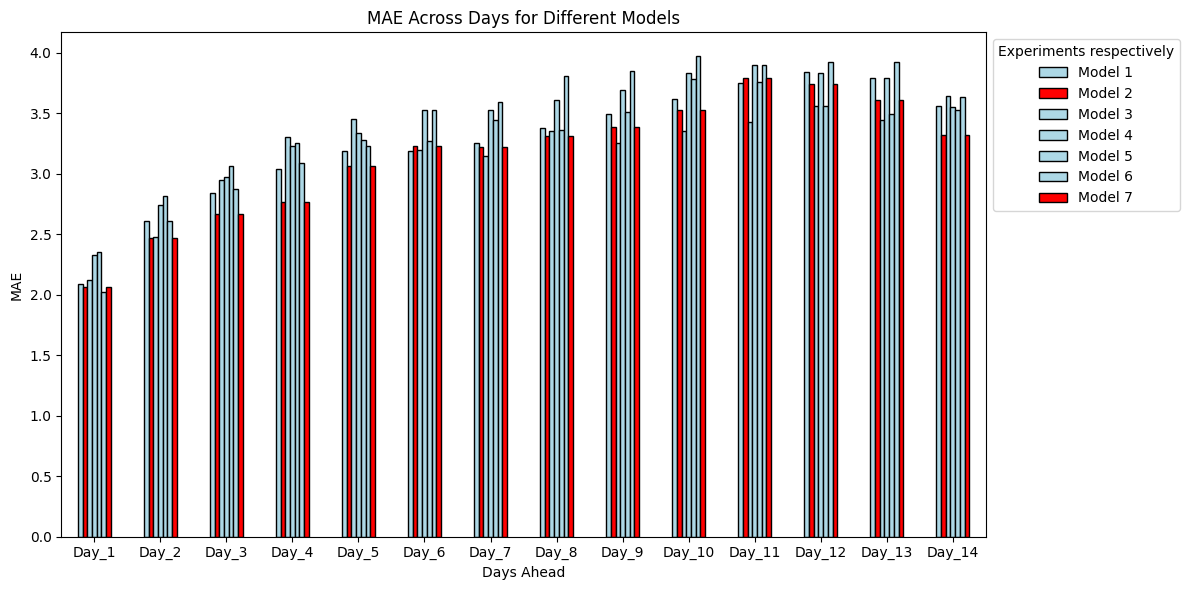

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the provided data
data = {
    "Experiments": ["Model 1", "Model 2", "Model 3", "Model 4", "Model 5", "Model 6", "Model 7"],
    "Day_1": [2.09, 2.06, 2.12, 2.33, 2.35, 2.02, 2.06],
    "Day_2": [2.61, 2.47, 2.48, 2.74, 2.82, 2.61, 2.47],
    "Day_3": [2.84, 2.67, 2.95, 2.97, 3.06, 2.87, 2.67],
    "Day_4": [3.04, 2.77, 3.30, 3.23, 3.25, 3.09, 2.77],
    "Day_5": [3.19, 3.06, 3.45, 3.34, 3.28, 3.23, 3.06],
    "Day_6": [3.19, 3.23, 3.20, 3.53, 3.27, 3.53, 3.23],
    "Day_7": [3.25, 3.22, 3.15, 3.53, 3.44, 3.59, 3.22],
    "Day_8": [3.38, 3.31, 3.35, 3.61, 3.36, 3.81, 3.31],
    "Day_9": [3.49, 3.39, 3.25, 3.69, 3.51, 3.85, 3.39],
    "Day_10": [3.62, 3.53, 3.35, 3.83, 3.78, 3.97, 3.53],
    "Day_11": [3.75, 3.79, 3.43, 3.90, 3.76, 3.90, 3.79],
    "Day_12": [3.84, 3.74, 3.56, 3.83, 3.56, 3.92, 3.74],
    "Day_13": [3.79, 3.61, 3.44, 3.79, 3.49, 3.92, 3.61],
    "Day_14": [3.56, 3.32, 3.64, 3.55, 3.53, 3.63, 3.32]
}

df = pd.DataFrame(data)

# Set the experiment names as the index for better labeling
df.set_index("Experiments", inplace=True)

# Create a bar chart for the average MAE across days
plt.figure(figsize=(12, 6))

# Create a list of colors for each bar, red for Model 2 and Model 7
colors = ['lightblue', 'red', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'red']

df.T.plot(kind="bar", color=colors, ax=plt.gca(),edgecolor='black')

# Add labels and title
plt.xlabel("Days Ahead")
plt.ylabel("MAE")
plt.title("MAE Across Days for Different Models")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Display the plot
plt.legend(title="Experiments respectively", loc='best',bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



Based on the plot, Model 2 and Model 7 are having most of the days ahead prediction with the lowest MAE.

To select the best deep learning model architecture for forecasting the mean daily temperature ("meantemp") with a forecasting horizon of 2 weeks ahead, we should consider both the average MAE across days and the overall performance trend across different experiments. A lower MAE indicates better model performance.

From the provided experiments, let's examine the results:

Model 2 (LSMT, units = 150 layers, n-steps = 30) has the lowest average MAE across days, which is 3.16.
Model 7 (GRU, units = 150 layers, n-steps = 30) also has an average MAE of 3.16, tying with Model 2 for the lowest error.

1. **Layer Architecture**

Both Model 2 and Model 7 have the same architecture, except that Model 2 uses an LSTM (Long Short-Term Memory) layer, while Model 7 uses a GRU (Gated Recurrent Unit) layer. In this case, since they have the same average MAE, wecan choose either model based on other factors like computational resources and training time.
Though, GRU is often computationally more efficient than LSTM, in this case, both methods can predict more or less the same results.

2. **Units (Number of Neurons in Hidden Layers):**


Units represent the number of neurons or memory cells in the hidden layers of the LSTM or GRU model.Increasing units generally allows the model to capture more complex patterns in the data. However, adding more units without proper regularization can lead to overfitting. The model may start memorizing noise in the training data, resulting in poor generalization to unseen data.

In the experiments, models with units set to 150, 200, and 100 were tested.
Based on the experiment, it seems that not too large number of hidden layers would work best for this RNN model, which is around 150 neutrons.

3. **n_steps (Number of Time Steps):**

n_steps represents the number of time steps (or days in this case) used as input features for the model. It determines how far back in time the model looks to make predictions. Increasing the number of time steps (n_steps) allows the model to consider a longer historical context when making predictions. This can be beneficial for capturing longer-term dependencies in the data. It can help the model recognize seasonality and cyclic patterns in time series data. At the same time, models with a higher n_steps require more memory and computational resources, which can be a concern for very long sequences, leading to a longer training time due to the longer input sequences. While, smaller n_steps limit the model's view of historical data, focusing on shorter-term patterns. This can be suitable for data with short-term dependencies and fast-changing dynamics.

In the experiments, n_steps values of 20, 30, 40, and 50 were tested. Based on the results, it seems that the smaller n_steps would be a better fit for this prediction model to capture the fluctuation of the pattern of mean temperature, which is around 30 time steps.


DISCUSS HOW TO IMPROVE THE PERFORMANCE OF MULTIVARIATE MODEL:

1. **More Data:**

If possible, acquire more historical data. Deep learning models, especially when dealing with time series data, tend to benefit from larger datasets. Thus, Mean Temperature will be better predicted with a bigger historical data to pick up the pattern of the weather.  

2. **Cross-Validation:**

Another way to improve the performance is using cross-validation techniques to better estimate the mean temperature and to ensure that your model generalizes well to unseen data. In this case, the model was just applied a houldout method, Cross validation approach will be a better technique to improve the performance for future experiment.

3. **Feature Selection:**

Evaluate the importance of different input features and consider removing less relevant ones to simplify the model and potentially reduce overfitting. During the data preprocessing stage, we have identified and eliminated the insignificant feature of 'meanpressure'. Yet, we can consider adding additional meteorological variables relevant to temperature data such as cloudiness and precipitation to improve model inputs.

4. **Regularization:**

Implement regularization techniques such as dropout or L2 regularization to prevent overfitting, especially for models performing well on the training data but poorly on the validation or test data. With a larger dataset, we could apply regularization approach to prevent overfitting issues.

5. **Hyperparameter Tuning:**

Keep on experiments with different hyperparameters for the chosen architecture. For example, try different numbers of units, layers, and sequence lengths (n-steps) to see if any combination yields better results.
